In [1]:
# core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# data
from sklearn.datasets import load_breast_cancer
%matplotlib inline

# Supervised Learning - Classification 

### Cancer Dataset

In [2]:
data = load_breast_cancer()
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
(
    X_train,
    X_test,
    y_train,
    y_test
) = train_test_split(
    data.data,
    data.target,
    stratify=data.target,
    test_size = 0.33,
    random_state=0
)

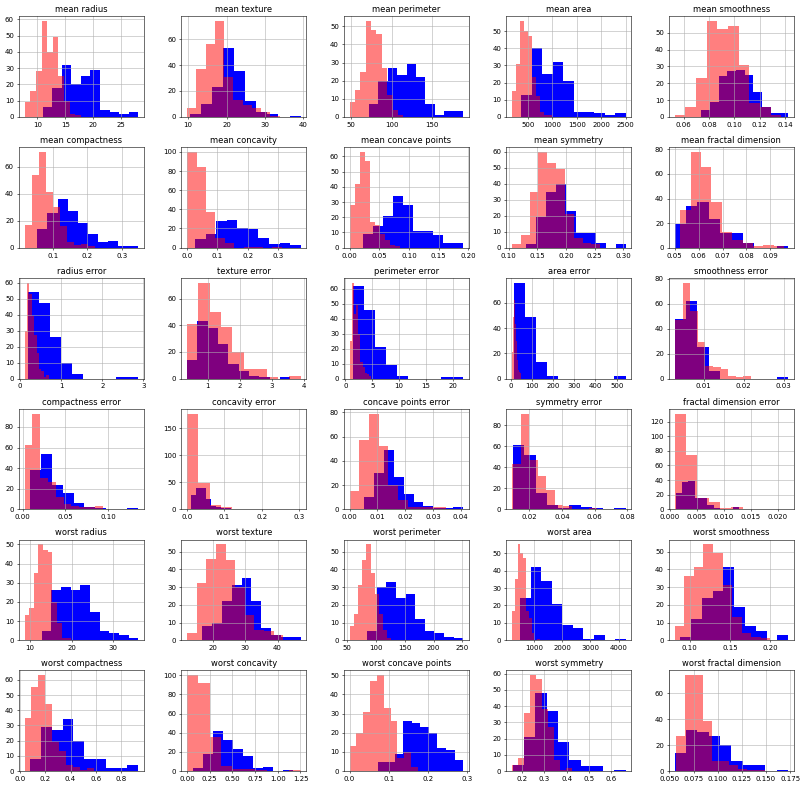

In [4]:
dataf = (
    pd.DataFrame(X_train, columns=data["feature_names"])
    .assign(target=y_train)
)
fig, axes = plt.subplots(figsize=(20,20), dpi=50, nrows=6, ncols=5)

# BLUE COLOR == 'benign', RED COLOR == 'malignant'
dataf[dataf["target"] == 0].drop("target", axis=1).hist(ax=axes, alpha=1, label='benign',color='b')
dataf[dataf["target"] == 1].drop("target", axis=1).hist(ax=axes, alpha=0.5, label='malignant',color='r');
del dataf, fig, axes # free memory

## Question 1
Exploratory data analysis (EDA)
- Print the target counts for your training data. 
- Explain, briefly and in bullets, what we may learn from the feature plots above. (For example, which features seem to be best differentiators between the two classes - benign and malignant) - BLUE COLOR == 'benign', RED COLOR == 'malignant'
- Based on the distributions above, would scaling be required for, say, a neural network?
<br>

- Industry reflections: Consider the data and its size. For this domain, is it enough data? Would you ask the domain experts anything?

In [39]:
a = (np.bincount(y_train))
print(f"number of beign: {a[0]} ")
print(f"number of beign: {a[1]}" )




# 142 instances af benign 
# 239 instances of malignant

number of beign: 142 
number of beign: 239


### Question 2
Create a KNeighborsClassifier for the above train and test data. Print the training and test accuracy. 
- (If using gridsearch on (X_train, y_train), document your choices of model parameters and ranges.)
- Bonus: Use .predict_proba and plot the result using plt.hist(probas[:, 1]) - What can this tell us?

Text(0, 0.5, 'Frequency')

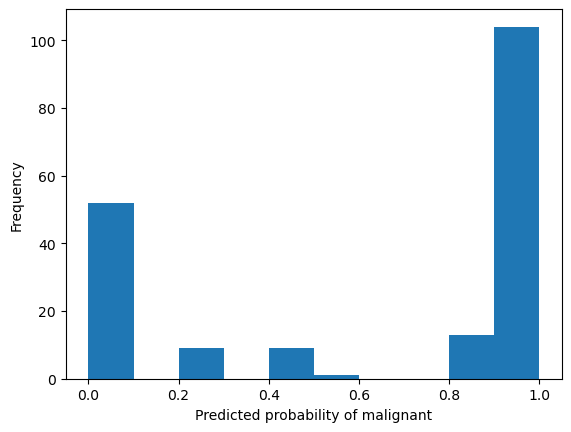

## Question 3
We'd like to try several other models. To save some work, write a function called eval_model that takes two arguments
<ul>
    <li>model: an instantiated classifier model</li>
    <li>name: a string, eg, "knn"</li>
</ul>
    
You can create a model like this:

knn = KNeighborsClassifier()

Then you can pass knn to the function as the model. The function should fit the model to X_train, and y_train, which should already be defined as global variables. Then it should score to model on the training and test data. X_test and y_test should also be defined as global variables.

- You can use gridsearch in the function. Same rules as stated in Q2




## Question 4
Now use eval_model to evaluate LogisticRegression, DecisionTreeClassifier, RandomForestClassifier and MLPClassifier. 
- Bonus: Plot the train and test accuracies for all estimators in a bar chart (Is this a fair comparison?)
 

Question 5:
Apply a scaling method (e.g., standard scaling) to your data and repeat question 4 with the scaled data.
- Remember that (X_test, y_test) are meant to be unseen data. Use this to decide what the scaler should fit to and transform on.
- Report the results of scaling the data
- Bonus: Explain what the scaler accomplishes for us.

## Question 6
Train a logistic regression estimator on a scaled version of X_train.

Then print the three features with the highest coefficients -- these are the features which the model most strongly links with the target, <i>malignant</i>. Print the three features with the lowest coefficients -- these are the features which the model most strongly links with the target, <i>benign</i>. On each line, print the feature name, followed by its coefficient value.

- Bonus: Plot the coefficients in a bar chart (*plt.bar()*) with the variable names on the x axis

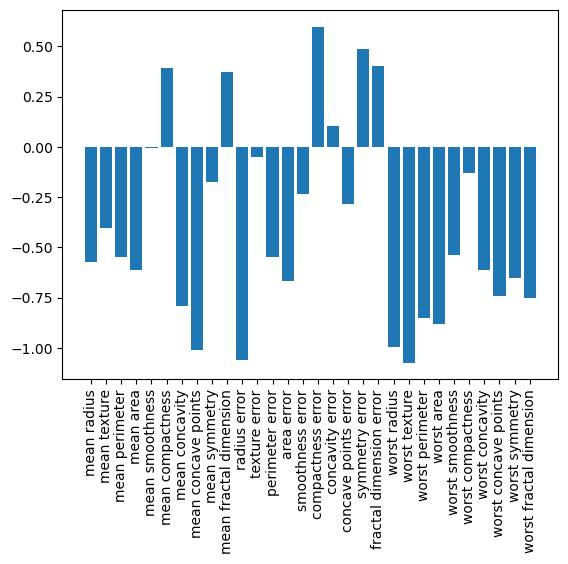

## Question 7
Print the 3 features that are the <i>least</i> informative about our target value (Hint: you should use the absolute value of coefficients.)

## Question 8
Use the classification_report function with the logreg model. It takes two arguments:
<ul>
    <li>y_test: the correct classifications</li>
    <li>preds: the model predictions. (You should assign logreg.predict(X_test) to preds.)</li>
    </ul>
    
There is an optional third argument, which is the feature names. You can write target_names=data.target_names.
        

## Question 9
For prediction probabilities (.predict_proba), predictions are related to these probabilities as follows: If the second probability is greater than .5, the prediction is 1. Otherwise, it's 0.  

1. Use the predict_proba method to get the probabilities of the logreg predictions on the X_test data. 
- Bonus: As in Q2, plot the the probabilities of class 1 (Malignant) and compare the plot with the same plot from Q2

2. Convert the probabilites to an arrray of predictions by mapping the following lambda function <br>
lambda a:1 if a[1]>.5 else 0

3. Show that the resulting array is equal to the original preds array, e.g., using numpy.array.equal or all()

4. Try to make the code below under *'Accuracies over probabilities* work. You need to supply 'preds' (from .predict) and 'probas' (from .predict_proba) - What can the resulting plot tell us about our model?


### Accuracy over probabilities

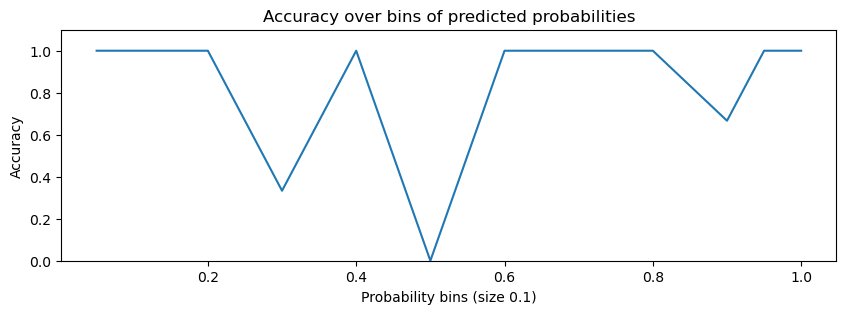

In [19]:
preds_df = (
    pd.DataFrame(
        {
            "preds": preds, # the predicted class
             "probas": probas[:, 1], # the predicted probability of class 1
             "y_test": y_test, # the true class
             "proba_bins": pd.cut(probas[:, 1], bins=20) # the bins (0.05) of the predicted probability
        }
    )
)

intervals, accs = [], []
for idx, interval in preds_df.groupby("proba_bins"):
    if not interval.empty:
        intervals.append(idx.right)
        accs.append(accuracy_score(interval["y_test"], interval["preds"]))

# plot accs over intervals
plt.figure(figsize=(10, 3))
plt.plot(intervals, accs) 
plt.xlabel("Probability bins (size 0.1)")
plt.ylabel("Accuracy")
plt.ylim(.0, 1.1)
plt.title("Accuracy over bins of predicted probabilities");

## Question 10
Write a function, predict_threshold, that takes two arguments:
<ul>
    <li>probas: the output of predict_proba (for a binary classification task)</li>
    <li>t: a threshold probability. Class 1 is predicted if the probability is greater than t. Otherwise class 0 is predicted.</li>
</ul>

Now produce a classification report for several different thresholds, using the probabilities output by logistic regression for the Cancer data. 
- Find a threshold that maximizes the precision for benign. 
- Find a threshold that maximizes precision for malignant. 
- Experiment with different thresholds -- what do you think is the best theshold for this particular domain - Predicting breast cancer? Why?